In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
data=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'],header=0)

In [4]:
data

,sepal length,sepal width,petal length,petal width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal length    149 non-null float64
sepal width     149 non-null float64
petal length    149 non-null float64
petal width     149 non-null float64
target          149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
features=['sepal length','sepal width','petal length','petal width']

In [8]:
x=data.loc[:,features].values

In [9]:
y=data.loc[:,['target']].values

In [10]:
x=StandardScaler().fit_transform(x)

In [11]:
from sklearn.decomposition import PCA

In [12]:
# It help to reduce the dimensionality of the dataset down to two dimensional 
# (It automaticlly take care of centering the data)

pca=PCA(n_components=2)
PC=pca.fit_transform(x)
PC

array([[-2.10795032, -0.64427554],
       [-2.38797131, -0.30583307],
       [-2.32487909, -0.56292316],
       [-2.40508635,  0.687591  ],
       [-2.08320351,  1.53025171],
       [-2.4636848 ,  0.08795413],
       [-2.25174963,  0.25964365],
       [-2.3645813 , -1.08255676],
       [-2.20946338, -0.43707676],
       [-2.17862017,  1.08221046],
       [-2.34525657,  0.17122946],
       [-2.24590315, -0.6974389 ],
       [-2.66214582, -0.92447316],
       [-2.2050227 ,  1.90150522],
       [-2.25993023,  2.73492274],
       [-2.21591283,  1.52588897],
       [-2.20705382,  0.52623535],
       [-1.9077081 ,  1.4415791 ],
       [-2.35411558,  1.17088308],
       [-1.93202643,  0.44083479],
       [-2.21942518,  0.96477499],
       [-2.79116421,  0.50421849],
       [-1.83814105,  0.11729122],
       [-2.24572458,  0.17450151],
       [-1.97825353, -0.59734172],
       [-2.06935091,  0.27755619],
       [-2.18514506,  0.56366755],
       [-2.15824269,  0.34805785],
       [-2.28843932,

In [13]:
# It help to get access the principal components using the components_variable 

pca.components_.T[:,0]

array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])

In [14]:
# After fit.transform we are putting into a dataframe and naming the components/columns

PCdf=pd.DataFrame(data=PC,columns=['pc1','pc2'])
PCdf

,pc1,pc2
0,-2.107950,-0.644276
1,-2.387971,-0.305833
2,-2.324879,-0.562923
3,-2.405086,0.687591
4,-2.083204,1.530252
...,...,...
144,1.859771,0.379344
145,1.542004,-0.908086
146,1.509255,0.264606
147,1.369096,1.015839


In [15]:
# Now we are concating the data into finaldf with name (PCdf,target), and axis=1 is for 'ROW' & axis=0 is for 'Columns'

finaldf=pd.concat([PCdf,data['target']],axis=1)

In [16]:
finaldf

,pc1,pc2,target
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa
...,...,...,...
144,1.859771,0.379344,Iris-virginica
145,1.542004,-0.908086,Iris-virginica
146,1.509255,0.264606,Iris-virginica
147,1.369096,1.015839,Iris-virginica


In [17]:
#Visulization of projection on 2D 

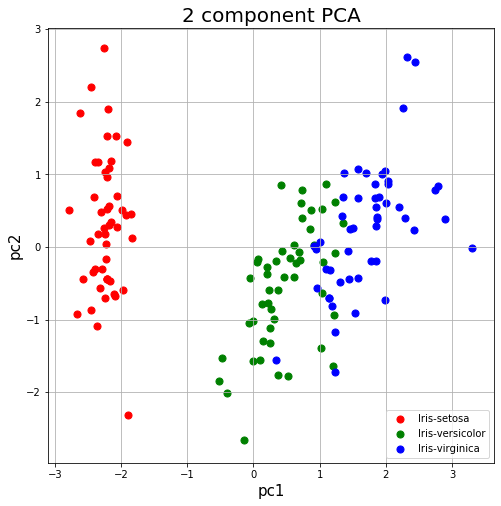

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
data["target"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: target, dtype: int64

In [20]:
#It indicate the proportion of the datasets variance that lies along the axis of each principal components
# with Explained variance Ratio you can see that the first principal component contains 72% of the variance and the second principal component contains 23% of the variance.
#Together, the two components contain 95.80% of the information.

pca.explained_variance_ratio_

array([0.72620033, 0.23147407])

0.9576744018556447


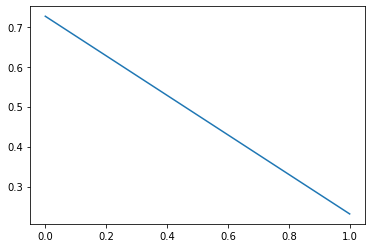

In [21]:
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)

In [22]:
from sklearn.datasets import fetch_openml

In [23]:
mnist = fetch_openml('mnist_784')

In [24]:
#The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/.
#It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples

mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [25]:
# we can see the number of rows and feature are available 
mnist.data.shape

(70000, 784)

In [26]:
#labels
mnist.target.shape

(70000,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train_img,x_test_img,y_train_lbl,y_test_lbl=train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [29]:
x_train_img.shape

(60000, 784)

In [30]:
x_test_img.shape

(10000, 784)

In [31]:
y_train_lbl.shape

(60000,)

In [32]:
y_test_lbl.shape

(10000,)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
# Fit on training set only.
scaler.fit(x_train_img)

# Apply transform to both the training set and the test set.
x_train_img = scaler.transform(x_train_img)
x_test_img = scaler.transform(x_test_img)

In [35]:
# Make an instance a model
pca1=PCA(0.95)

In [36]:
# Fitting an Image on traning set
pca1.fit(x_train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca1.n_components_

327

In [38]:
x_train_img = pca1.transform(x_train_img)
x_test_img = pca1.transform(x_test_img)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logReg = LogisticRegression(solver = 'lbfgs')

In [42]:
#Training the model on the data, storing the information learned from the data
# Model is learning the relationship between x (digits) and y (labels)

logReg.fit(x_train_img, y_train_lbl)

C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bhumihar Rakesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lb

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Returns a NumPy Array
# Predict for One Observation (image)
logReg.predict(x_test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [50]:
# Predict for Multiple Observations (images) at Once
logReg.predict(x_test_img[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [51]:
#Basically, how the model performs on new data- test set

score = logReg.score(x_test_img, y_test_lbl)
print(score)

0.9117


In [ ]:
It is showing that model has prediceted a good score 91% hence its a good sign that model able to give good prediction